In [1]:
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
from regression import regressor
import scipy
import time

In [2]:
def normal(x, mu, sigma):
    return 1/(np.sqrt(2*np.pi*sigma**2))*np.exp(-(x-mu)**2/(2*sigma**2))

In [3]:
min = 0.0
max = 10.0
bins = 10
histo = regressor.HistogramRegressor(min, max, bins)
spline = regressor.SplineRegressor(min, max, bins, 3)

In [4]:
mu = 5.0
sigma = 1.0
for i in range(1000):
    x = np.random.normal(mu, sigma)
    if x < min or x > max:
        continue
    for regressor in [histo, spline]:
        regressor.score(x)

/home/mgale/dev/nurbs/regression/regressor.py:87: RuntimeWarning: invalid value encountered in divide
  return self._coeffs / (self._norms * self._n)


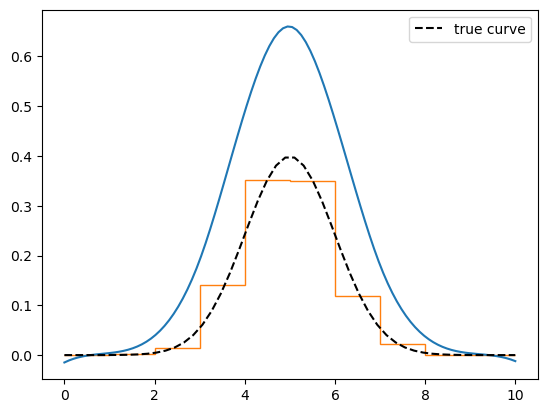

In [5]:
spline.plot()
histo.plot()
x = np.linspace(0,10)
plt.plot(x, normal(x, mu, sigma), "k--", label= "true curve")
plt.legend()
plt.show()

In [6]:
print(np.array_str(spline.calculate_orthogonal(),precision=2, max_line_width=500))

[[ 1.15e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00]
 [-3.78e-01  6.04e-01  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00]
 [ 2.91e-01  8.72e-02  5.47e-01  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00]
 [-6.32e-02  5.76e-02  2.20e-01  4.83e-01  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00]
 [ 0.00e+00  1.98e-04  2.38e-02  2.36e-01  4.79e-01  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00]
 [ 0.00e+00  0.00e+00  1.98e-04  2.38e-02  2.36e-01  4.79e-01  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00]
 [ 0.00e+00  0.00e+00  0.00e+00  1.98e-04  2.38e-02  2.36e-01  4.79e-01  0.00e+00 